In [1]:
import numpy as np
import matplotlib.pylab as plt
import cv2

(119, 119)


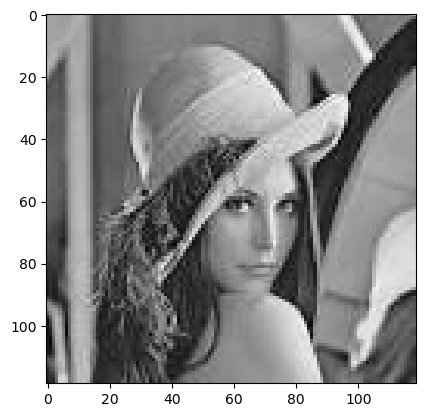

In [45]:
image = cv2.imread("../data/lena.jpeg", cv2.IMREAD_GRAYSCALE)
print(image.shape)
plt.imshow(image, cmap="gray")
plt.show()

# Gradient Computation

In [52]:
def compute_x_gradients(image):
    return image[:, 1:] - image[:, :-1]

def compute_y_gradients(image):
    return image[1:] - image[:-1]

def compute_gradients(image):
    image_x_padded = cv2.copyMakeBorder(image, 0, 0, 0, 1, cv2.BORDER_CONSTANT, value=0)
    image_y_padded = cv2.copyMakeBorder(image, 0, 1, 0, 0, cv2.BORDER_CONSTANT, value=0)
    
    x_grads = compute_x_gradients(image_x_padded.astype(np.float64))
    y_grads = compute_y_gradients(image_y_padded.astype(np.float64))
    grads = np.stack([x_grads, y_grads], axis=0)
    return grads

In [53]:
grads = compute_gradients(image)
grads = (grads - grads.min()) / (grads.max() - grads.min())
grads.shape

(2, 119, 119)

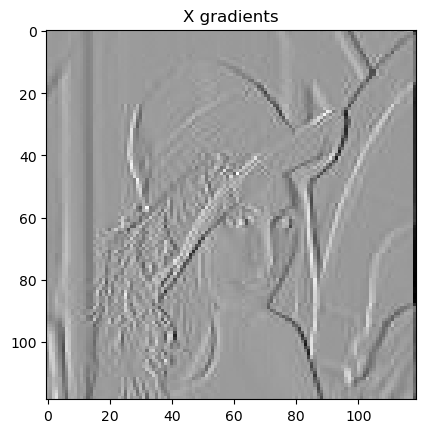

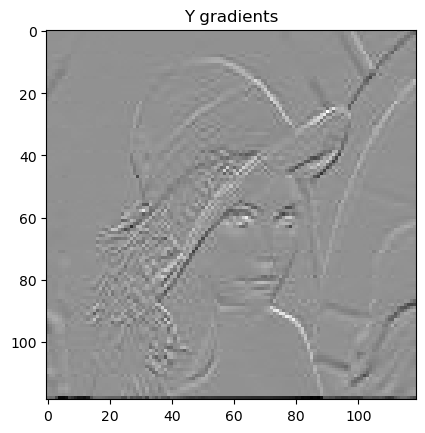

In [54]:
plt.imshow(grads[0], cmap="gray")
plt.title("X gradients")
plt.show()

plt.imshow(grads[1], cmap="gray")
plt.title("Y gradients")
plt.show()

# Denoising before Gradient Computation

In [56]:
def create_gaussian_filter(sigma):
    size = int(2 * np.pi * sigma)
    if size % 2 == 0: size += 1

    coords = np.arange(size) - size//2
    gaussian_density = np.exp(-0.5 * (coords/sigma)**2)
    gaussian_density = gaussian_density.reshape(-1, 1) * gaussian_density.reshape(1, -1)
    gaussian_density /= gaussian_density.sum()
    return gaussian_density


def gaussian_blur(image, sigma):
    gaussian_filter = create_gaussian_filter(sigma)
    Hf, Wf = gaussian_filter.shape

    image_padded = cv2.copyMakeBorder(image, Hf//2, Hf//2, Wf//2, Wf//2, cv2.BORDER_REFLECT, value=0)
    image_convolved = cv2.filter2D(image_padded.astype(np.float64), ddepth=-1, kernel=gaussian_filter)
    return image_convolved

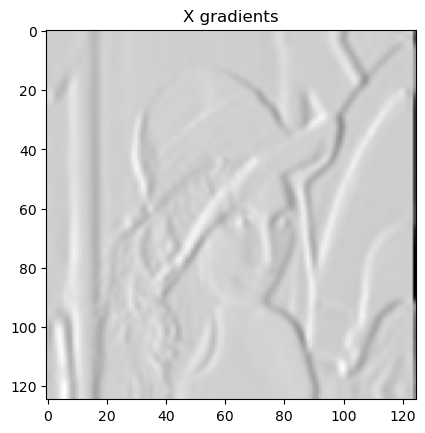

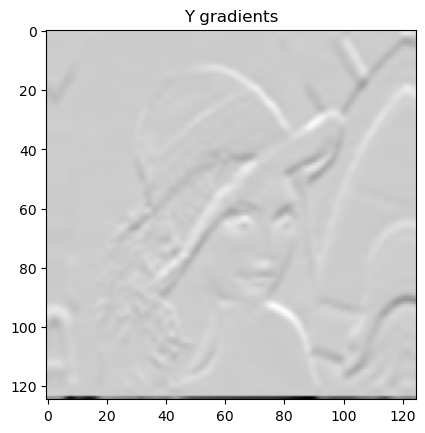

In [57]:
image_blurred = gaussian_blur(image, 1)
grads = compute_gradients(image_blurred)
grads = (grads - grads.min()) / (grads.max() - grads.min())

plt.imshow(grads[0], cmap="gray")
plt.title("X gradients")
plt.show()

plt.imshow(grads[1], cmap="gray")
plt.title("Y gradients")
plt.show()

# 2nd Derivative

In [38]:
def compute_x_2nd_derivative(image):
    return image[:, 2:] - 2*image[:, 1:-1] + image[:, :-2]

def compute_y_2nd_derivative(image):
    return image[2:] - 2*image[1:-1] + image[:-2]

def compute_2nd_derivative(image):
    image_x_padded = cv2.copyMakeBorder(image, 0, 0, 1, 1, cv2.BORDER_CONSTANT, value=0)
    image_y_padded = cv2.copyMakeBorder(image, 1, 1, 0, 0, cv2.BORDER_CONSTANT, value=0)
    
    x_grads = compute_x_2nd_derivative(image_x_padded.astype(np.float64))
    y_grads = compute_y_2nd_derivative(image_y_padded.astype(np.float64))

    grads = np.stack([x_grads, y_grads], axis=0)
    return grads

In [58]:
grads = compute_2nd_derivative(image)
grads.shape

(2, 119, 119)

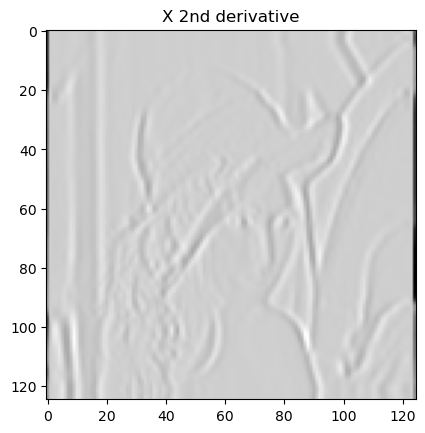

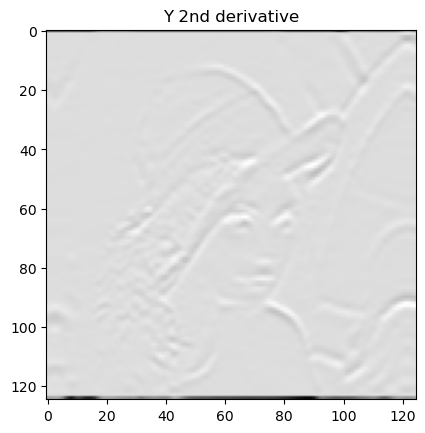

In [59]:
image_blurred = gaussian_blur(image, 1)
grads = compute_2nd_derivative(image_blurred)
grads = (grads - grads.min()) / (grads.max() - grads.min())

plt.imshow(grads[0], cmap="gray")
plt.title("X 2nd derivative")
plt.show()

plt.imshow(grads[1], cmap="gray")
plt.title("Y 2nd derivative")
plt.show()